<hr style="border-top: 5px solid black;">

<div class="alert alert-block alert-info" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Residual analysis on Simple Linear Regresssion in R.</font></h1></center>
    <ol>
        <li><a href="#objective1">Overview of Assumptions in Linear Regression.</a></li><br>
        <li><a href="#objective2">Transformations.</a></li><br>
<!--         <li><a href="#objective3">Experimentwise Error Rates and the Bonferroni Correction.</a></li><br>
        <li><a href="#objective4">Tukey’s Honestly Significant Difference.</a></li><br> -->
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective1" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Overview of Assumptions in Linear Regression.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The Basics:</u></strong>
        <li>Many of the assumptions are concerned with the $\epsilon_j$ term which cannot be directly observed</li><br>               
        <li>The linear model is appropriate for the response and explantory variables.</li><br>
        <li>The error term $\epsilon_j$ is independent from one another</li><br>        
        <li>The error term is drawn from a normal distribution</li><br>
        <li>The mean of the error term $\epsilon = 0$, which will always be met using the least-square regression,</li><br> 
        <li>The least-square regression estimates of $\hat{y_j}$ will gurantee that the sum of the residuals is 0, which makes the mean of the error term $\epsilon = 0$</li><br>           
        <li>The variance of all error terms is $\sigma^2$</li><br>
        <li>Since we can't observe the error, we can use the residuals as a proxy for the $\epsilon$</li><br>      
    </ul>
<hr>
    <ul><strong><u>Residual Plots:</u></strong>
        <li>Since the residuals are important at understanding the error of the model, there are several plots that we can use to evaluate the residuals in the model.</li><br>               
        <li>The normal q-q plot of the sample residual is often used to test the assumption of normality. The larger the sample size the less concerned we can be abotu the non-normal population of error terms.</li><br> 
        <li>The plot of the residuals against the fitted values is useful in assessing homoscedasticity (equal variance of the error terms)</li><br>               
        <li>The plot of the residuals against all the explanatory variables will give us the esame conclusion as the other residual plots when applied to a simple linear regression. But it is useful in other contexts.</li><br> 
    </ul>    
<hr>
    <ul><strong><u>Diagnosing Issues with Residual Plots:</u></strong>
        <li><strong>Homoscedasticity issues with Fitted vs Residual Plot</strong>: 
            <ul>A fan-shape
                <li>majority of points are in the middle and fan out at either ends</li><br>               
                <li>majority of points are at either ends of the fitted axis and minimal in the center of the fitted axis</li><br>   
                <li>points fan out from the lower end of the fitted axis</li><br>
                <li>points fan out from the upper end of the fitted axis</li><br>                
            </ul></li><br>               
        <li>The MASS Rubber dataset will be used to illustrate some of these patterns and methods in R that can be used to plot the residuals.</li><br>               
<!--         <li></li><br>               
        <li></li><br>               
        <li></li><br>               
        <li></li><br>                -->
    </ul>    
</div>

## Load Data

In [1]:
library('MASS')
attach(Rubber)
str(Rubber)

'data.frame':	30 obs. of  3 variables:
 $ loss: int  372 206 175 154 136 112 55 45 221 166 ...
 $ hard: int  45 55 61 66 71 71 81 86 53 60 ...
 $ tens: int  162 233 232 231 231 237 224 219 203 189 ...


# Perform Linear Regression Model and plot Boxplot, Histogran and Scatter plot of Residual and Fitted Values

 - residual() # to get residuals
 - fitted.values() # to get fitted values
 - The points on the normal q-q plot do not evenly line up to the diagonal line, but the box plot and histogram of the residuals suggest data is normally distributed.
 - The residual to fitted values plot also suggest the residuals are evenly distributed accross all points of the fitted values, which suggest homoscedasticity.

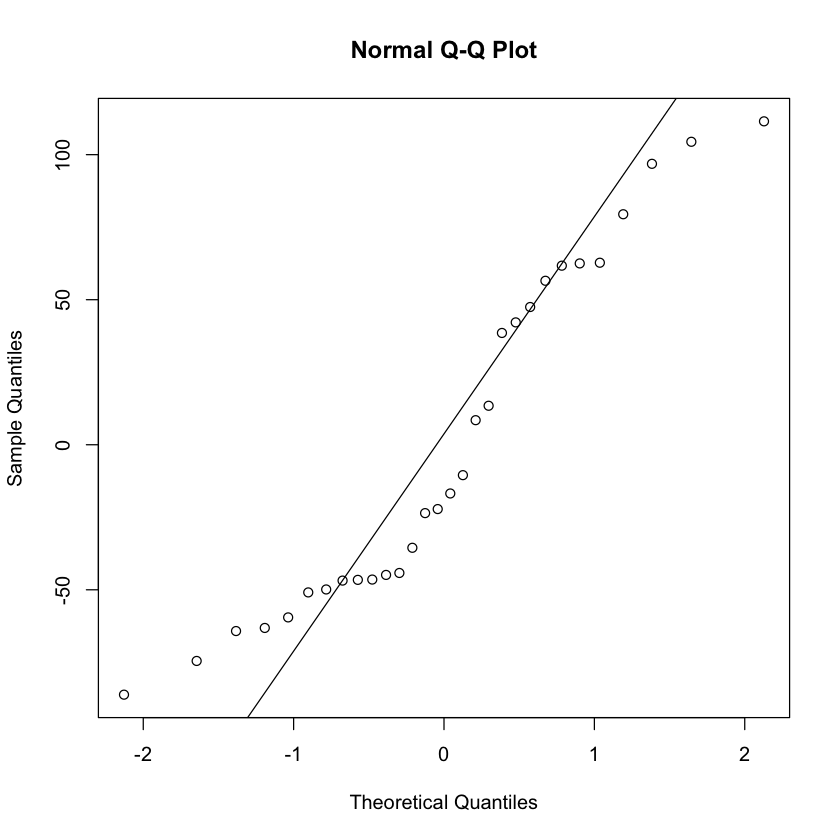

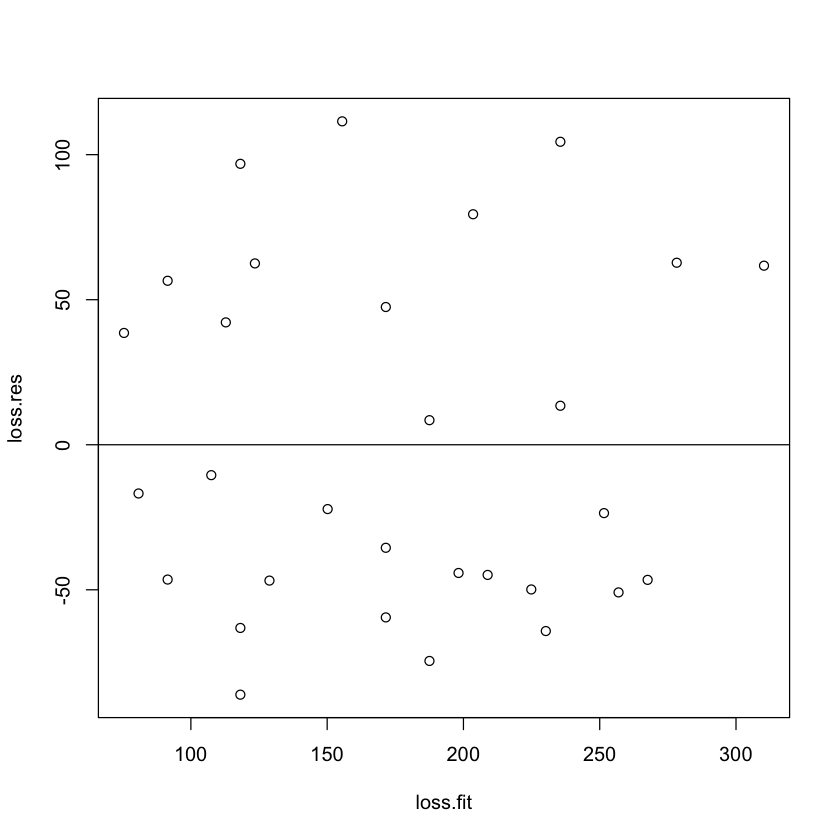

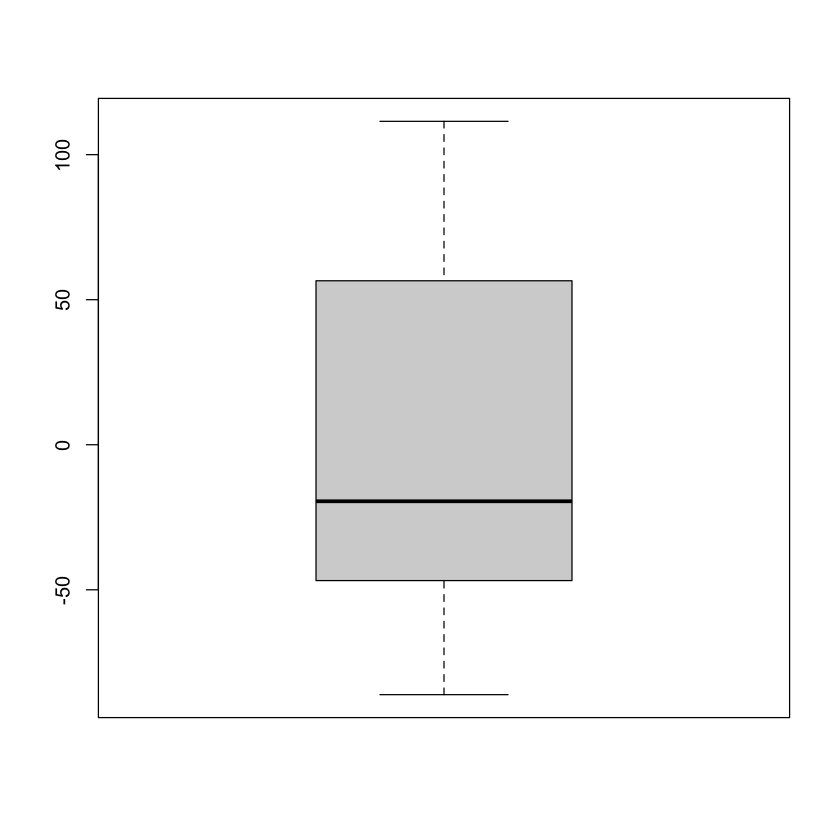

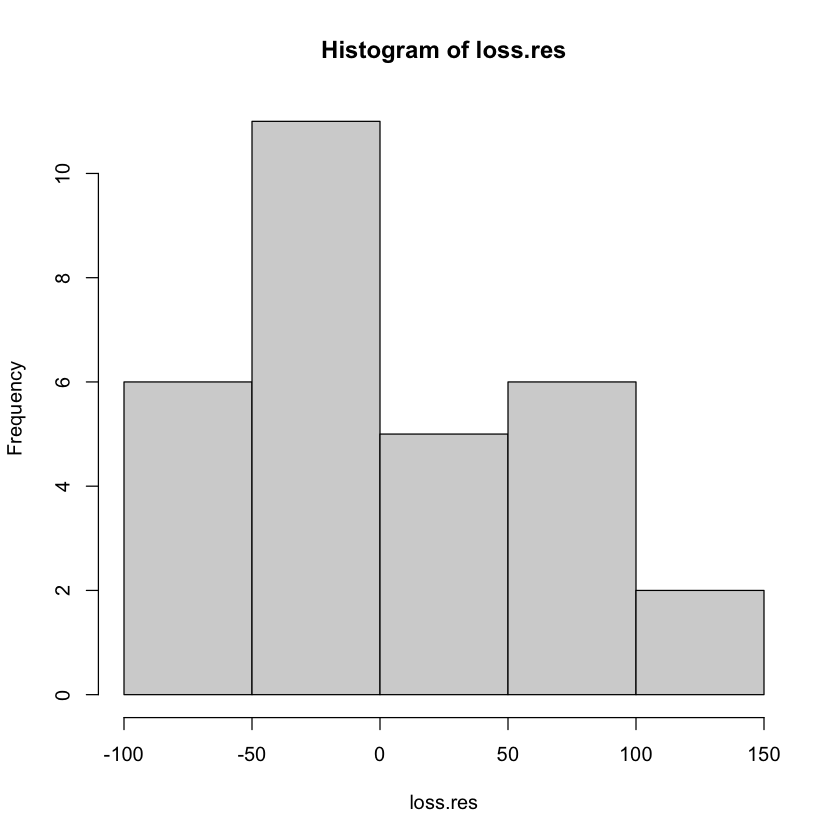

In [2]:
loss.lm <- lm(loss~hard)
loss.res <- residuals(loss.lm)
loss.fit <- fitted.values(loss.lm)

# plot qqnorm and qq line
qqnorm(loss.res)
qqline(loss.res)

# plot residual versus fitted
plot(loss.res~loss.fit)
abline(h=0)

# plot boxplot
boxplot(loss.res)

# plot histogram of residual
hist(loss.res)

<hr style="border-top: 5px solid black;">

<div id="objective2" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Transformation.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The Basics:</u></strong>
        <li>If the plot of residuals against the fitted values violates homoscedasticity or an appropriate linear model, then a option is to transform the data.</li><br>
        <li>Transformation is a method that rescales the data so that makes the data more linearly related.</li><br>        
        <li>
            <ul>Guidelines for transformation data with a strong right skew and residual plots violate assumption of fitted model.
                <li>For the independent variable try fitting the model with $ln(𝑥)$ or $\sqrt{x}$</li><br>
                <li>For the response (dependent) variable try  fitting the model with $$\ln(y)=\beta_0+\beta_1\ln(x)+\varepsilon$$</li><br>
            </ul>            
        </li><br>
        <li>If the plot of the residuals against the fitted values has a fan-shape, try applying a natural log transformation on the response variable y.</li><br> 
        <li>The following example will use the MASS forbes dataset, which relates boiling water to air pressure.</li><br>        
    </ul>
</div>

# Load Data

In [3]:
library('MASS')
attach(forbes)
str(forbes)

'data.frame':	17 obs. of  2 variables:
 $ bp  : num  194 194 198 198 199 ...
 $ pres: num  20.8 20.8 22.4 22.7 23.1 ...


# Apply linear regression model and save lm, res, and fitted values

In [4]:
# Linear model on pressure and boiling water
forbes.lm <- lm(pres~bp)

# Residuals and fitted values
forbes.res <- residuals(forbes.lm)
forbes.fit <- fitted.values(forbes.lm)

# Summary
summary(forbes.lm)


Call:
lm(formula = pres ~ bp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25717 -0.11246 -0.05102  0.14283  0.64994 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -81.06373    2.05182  -39.51   <2e-16 ***
bp            0.52289    0.01011   51.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2328 on 15 degrees of freedom
Multiple R-squared:  0.9944,	Adjusted R-squared:  0.9941 
F-statistic:  2677 on 1 and 15 DF,  p-value: < 2.2e-16


# Visual Data

 - The linear model and normal qq plot look fine but the residual is not linear, it has a u-shape
 - Although the linear regression inference test suggest we can rejust the Ho, the residual plot suggest that this data violates the assumption behind the linear model.
 - we can then transform the data to see if this helps.

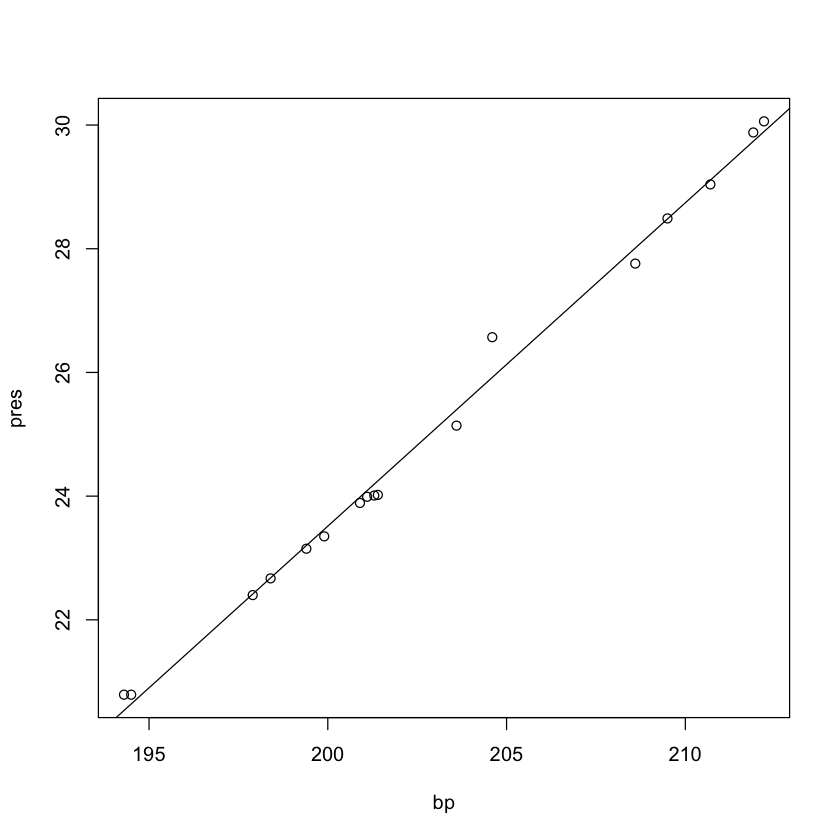

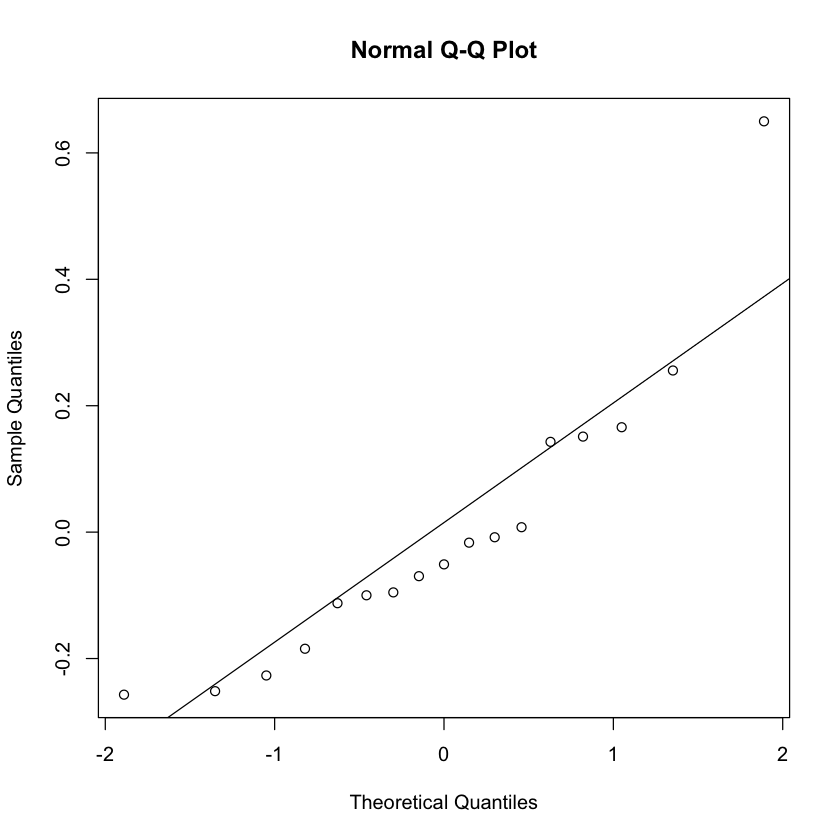

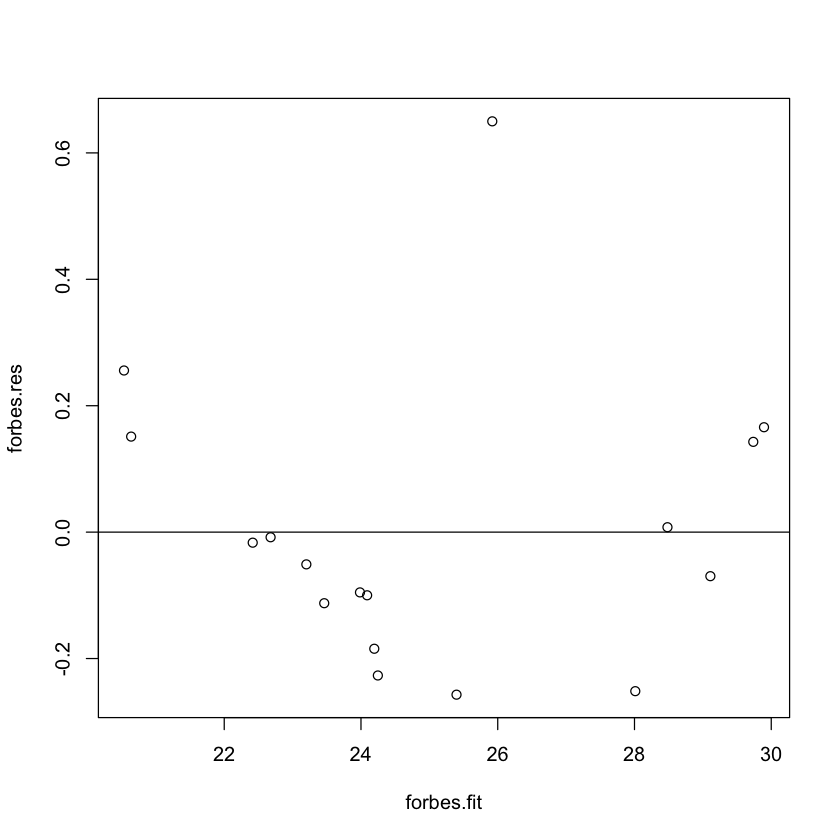

In [5]:
plot(pres~bp); abline(forbes.lm)
qqnorm(forbes.res); qqline(forbes.res)
plot(forbes.res~forbes.fit); abline(h=0)

# Transform data using log to adjust the residual and fitted plot

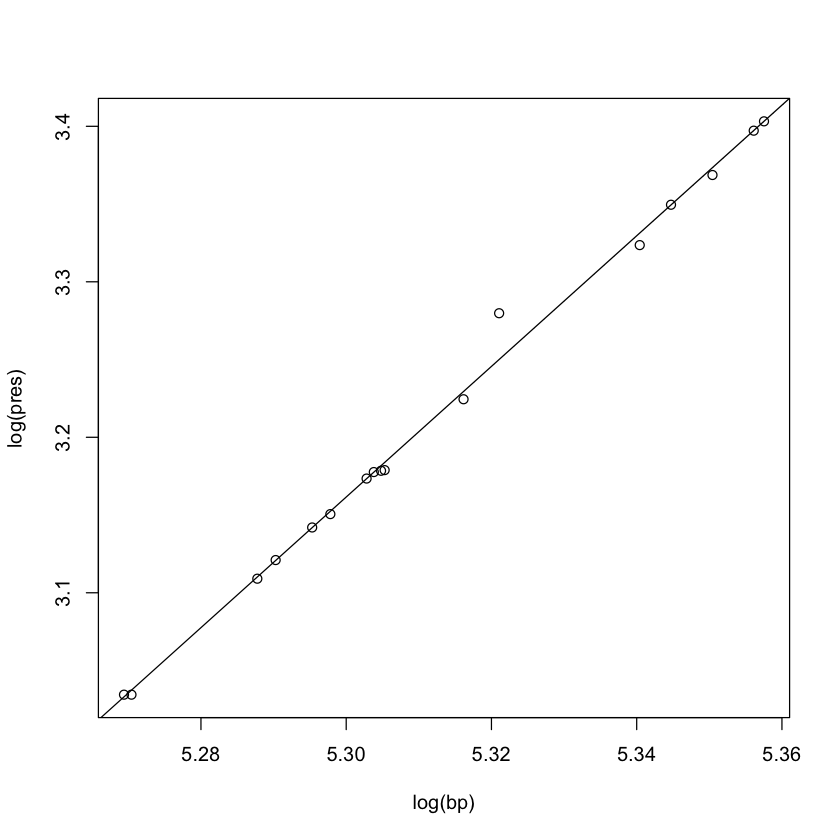

In [6]:
# log transformation on both response and independent variable
forbes.lm2 <- lm( log(pres) ~ log(bp) ) 
plot( log(pres) ~ log(bp) ); abline(forbes.lm2)

# Plot the residual vs fitted scatter plot and the normal qq plot

 - The log transformation has improved the fitted versus residual plot BUT there is still a crazy outlier.
 - The outlier can only be removed if there is clear evidence of an experimental error during the collection process

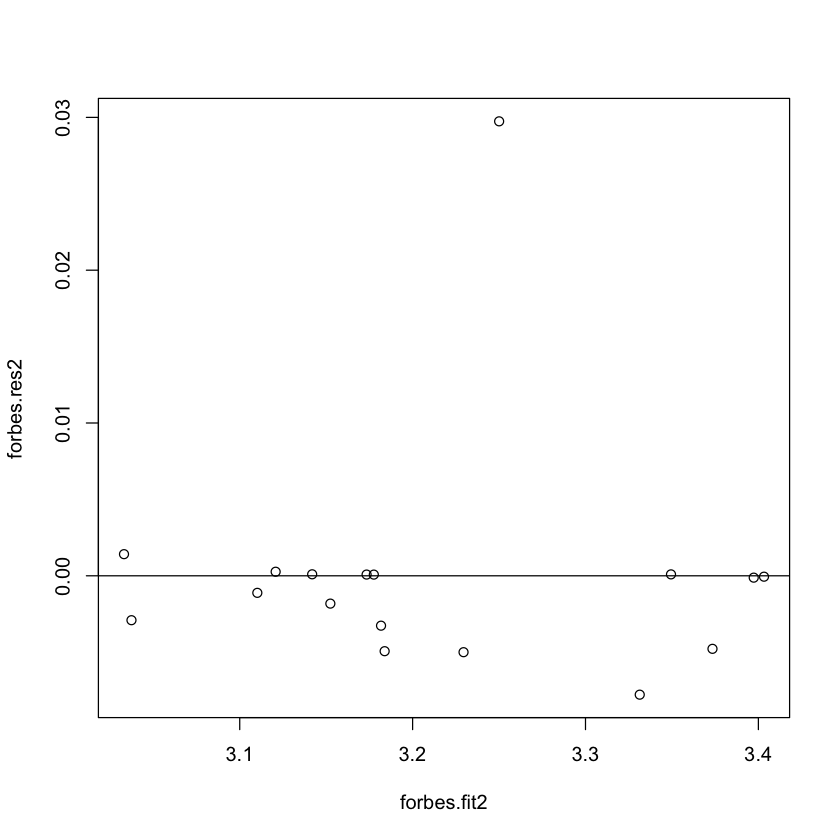

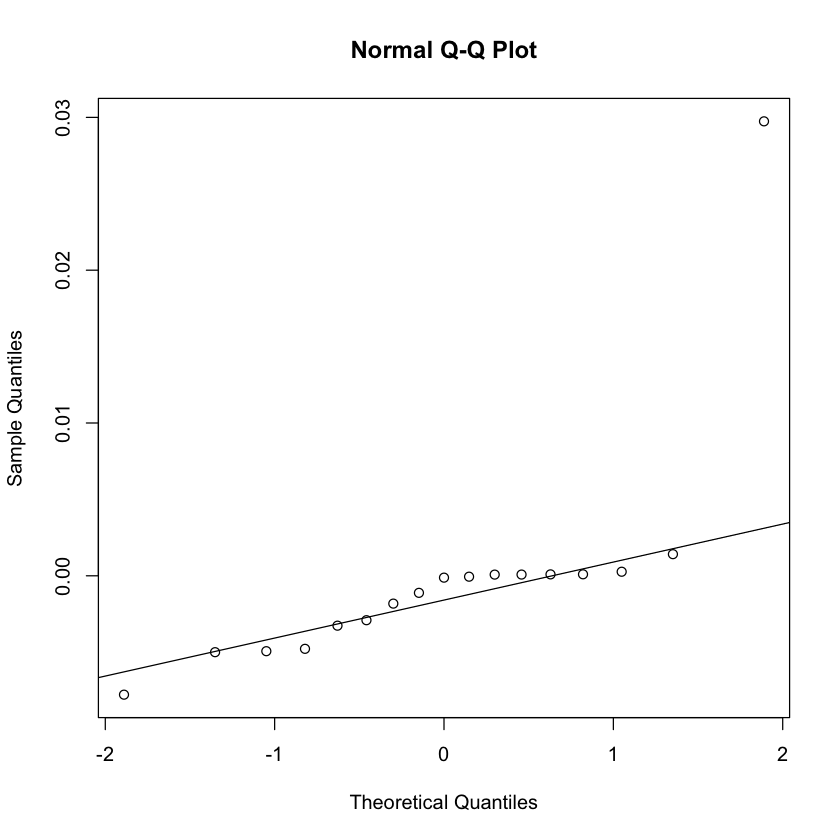

In [7]:
# Save residual and fitted values to variables
forbes.res2 <- residuals(forbes.lm2)
forbes.fit2 <- fitted.values(forbes.lm2)

# plot the residual fitted scatter plot with an abline
plot(forbes.res2 ~ forbes.fit2); abline(h=0)

# plot the normal qq plot on the residual  with a qq line
qqnorm(forbes.res2); qqline(forbes.res2)

<hr style="border-top: 5px solid black;">